# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT-IDSS/Week 1/Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The dataframe has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* order_id, customer_id, food_preparation_time, and delivery_time have int64 datatype
* restaurant_name, cuisine_type, day_of_the_week, and rating have object datatype
* cost_of_the_order has float64 datatype

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Identify null rows in each column, and add them together (True = 1, False = 0) to receive the total number of missing values in each column.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing value in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Select food_preparation_time column, and use .describe() to view its descriptive statistics
df['food_preparation_time'].describe()
#df.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The minimum, average and maximum time it takes for food to be prepared once an order is placed are 20, 27.37, and 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [ ]:
# Select rating column, and use value_counts() to find the count of each unique values in the column.
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order Id

In [ ]:
# Find number of unique values in order_id
df["order_id"].nunique()

1898

#### Customer Id

In [ ]:
# Find number of unique values in customer_id
df["customer_id"].nunique()

1200

#### Restaurant Name

In [ ]:
# Find number of unique values in restaurant_name
df["restaurant_name"].nunique()

178

#### Cuisine Type

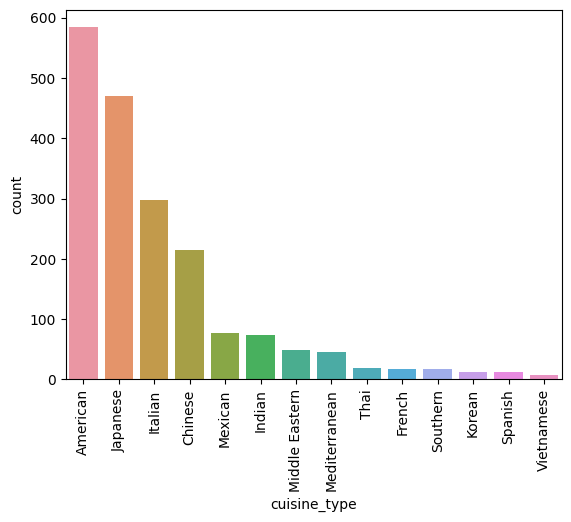

In [ ]:
# Create countplot of cuisine_type, which contains categorical variable in descending order (which is the default of value_counts() method, hence its index can be used as reference)
sns.countplot(df, x = "cuisine_type", order = df["cuisine_type"].value_counts().index)
plt.xticks(rotation = 90);

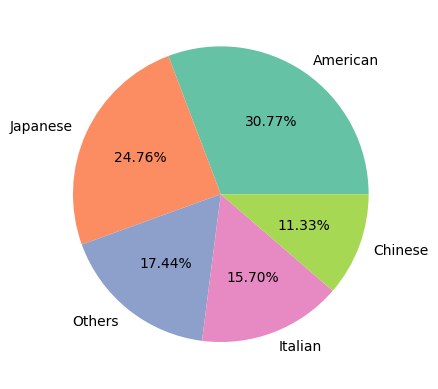

In [ ]:
# Convert cuisine_type that's not American, Japanese, Italian, and Chinese into Others for plotting a pie chart
def convert_to_others(cuisine_type):
  if cuisine_type in ["American", "Japanese", "Italian", "Chinese"]: # if the value of cuisine_type also exists in the list, return the cuisine_type as is.
    return cuisine_type
  else:
    return "Others"

# Create a new dataframe for the pie chart, and apply the conversion function
pie_df = df["cuisine_type"].apply(convert_to_others)

# Plot pie chart
plt.pie(pie_df.value_counts(),
        labels = pie_df.value_counts().index,  # Label each pie slice
        autopct = lambda p: '{:.2f}%'.format(p),  # Format string to display percentage with 2 decimal points
        colors = sns.color_palette("Set2")  # Change the color palette
        );

#### Observation:

American, Japanese, Italian, and Chinese cuisine constitutes the majority of orders (82.56% of all orders) placed through the online portal.

#### Cost of the Order

In [ ]:
# Create a function to plot histogram and boxplot of a feature on the same figure, and with shared x-axis
def hist_boxplot(feature):
  f, (ax_box, ax_hist) = plt.subplots(2, # number of rows of subplot grid
                                      sharex=True, # x-axis is shared among subplots
                                      gridspec_kw={"height_ratios": (.15, .85)} # height ratio between rows of the grid
                                      )
  # Create boxplot, with ax indicating position on pre-existing subplot grid
  sns.boxplot(x = feature, ax = ax_box)
  # Create histplot
  sns.histplot(x = feature, ax = ax_hist, kde = True)

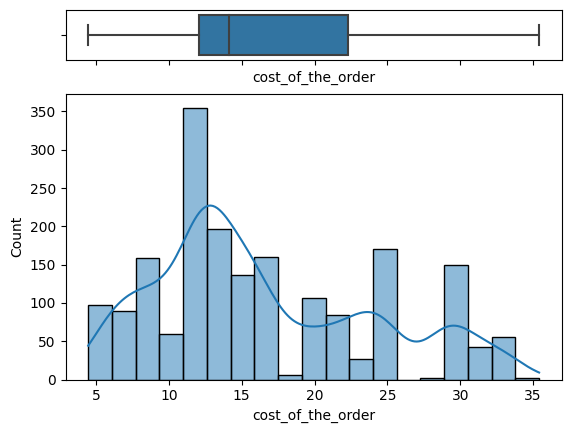

In [ ]:
# Call function to create histogram and boxplot of cost_of_the_order
hist_boxplot(df["cost_of_the_order"]);

### Observation:
Cost of order has a right-skewed distribution.

#### Day of the Week

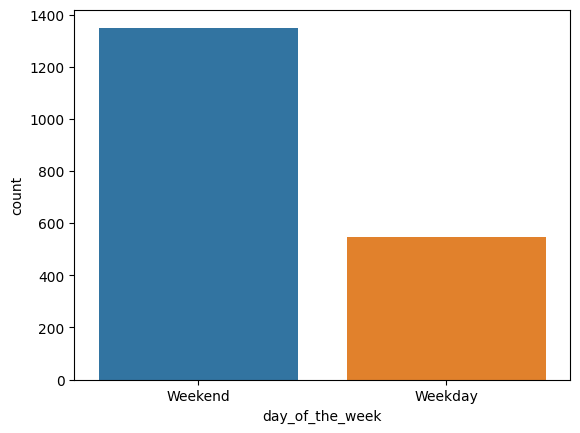

In [ ]:
# Create countplot of day_of_the_week
sns.countplot(df, x = "day_of_the_week");

### Observation:
There are significantly more orders placed on Weekend than Weekday.

#### Rating

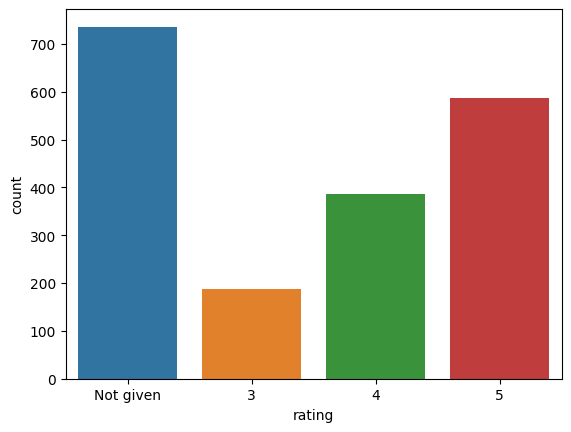

In [ ]:
# Create countplot of rating variable
sns.countplot(df, x = "rating", order = ["Not given", "3", "4", "5"]);

#### Observation:
Most customers do not provide a rating, but from ratings that are provided: higher rating is provided more often than lower rating

#### Food Preparation Time

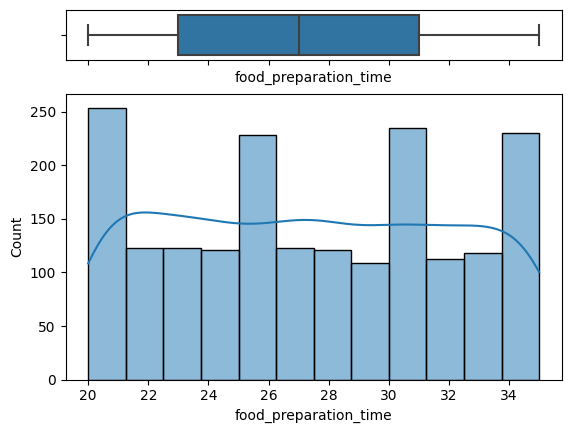

In [ ]:
# Create histogram and boxplot of food_preparation_time
hist_boxplot(df["food_preparation_time"]);

#### Observation:
Food preparation time has a uniform distribution.

#### Delivery Time

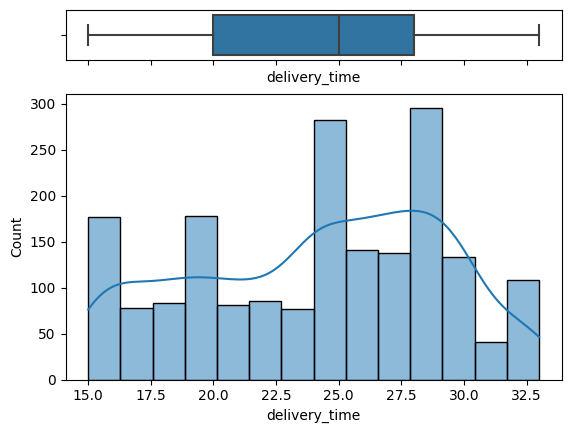

In [ ]:
# Create histogram and boxplot of delivery time
hist_boxplot(df["delivery_time"])

#### Observation:
Delivery Time has a left-skewed distribution.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Count the number of orders received by each restaurants (in descending order), and return the top 5 rows
df["restaurant_name"].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of number of orders received are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Filter dataframe where day_of_the_week is "Weekend", then count the number of orders for each cuisine_type
df[df["day_of_the_week"]=="Weekend"]["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Filter the dataframe where cost_of_order > 20
cost_more_than_20 = df[df["cost_of_the_order"] > 20].shape[0]

# Convert cost_more_than_20 into a percentage of total number of orders
percent_cost_more_than_20 = cost_more_than_20/df.shape[0]*100
print("Percentage of orders, which cost more than $20, is: {:.2f}%".format(percent_cost_more_than_20))

Percentage of orders, which cost more than $20, is: 29.24%


#### Observations:
29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [ ]:
# View descriptive statistics of delivery_time
df["delivery_time"].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Count number of orders by each customers (customer_id), and display the top 3 in descending order
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 most frequent customers are:
1. customer id = 52832, with 13 orders placed
2. customer id = 47440, with 10 orders placed
3. customer id = 83287, with 9 orders placed

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cost of the Order vs **Cuisine**

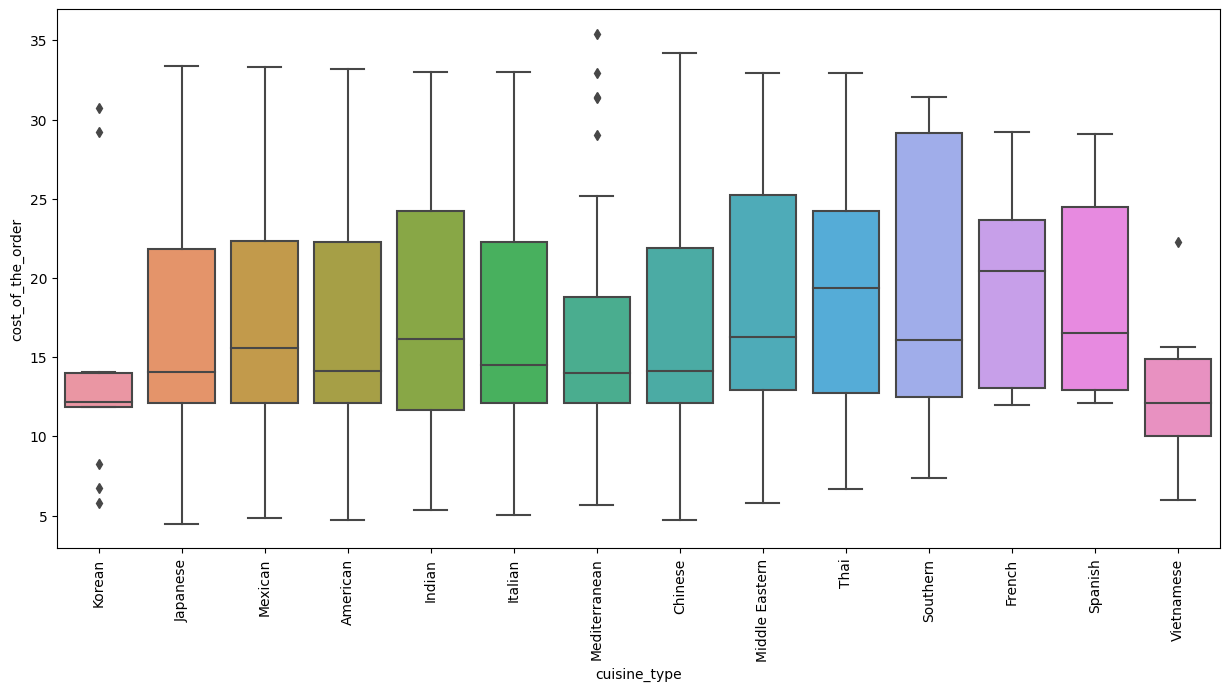

In [ ]:
# Plot boxplot of cost_of_the_order vs cuisine_type
plt.figure(figsize = (15, 7))
sns.boxplot(df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 90);

#### Food Preparation Time vs Cuisine Type

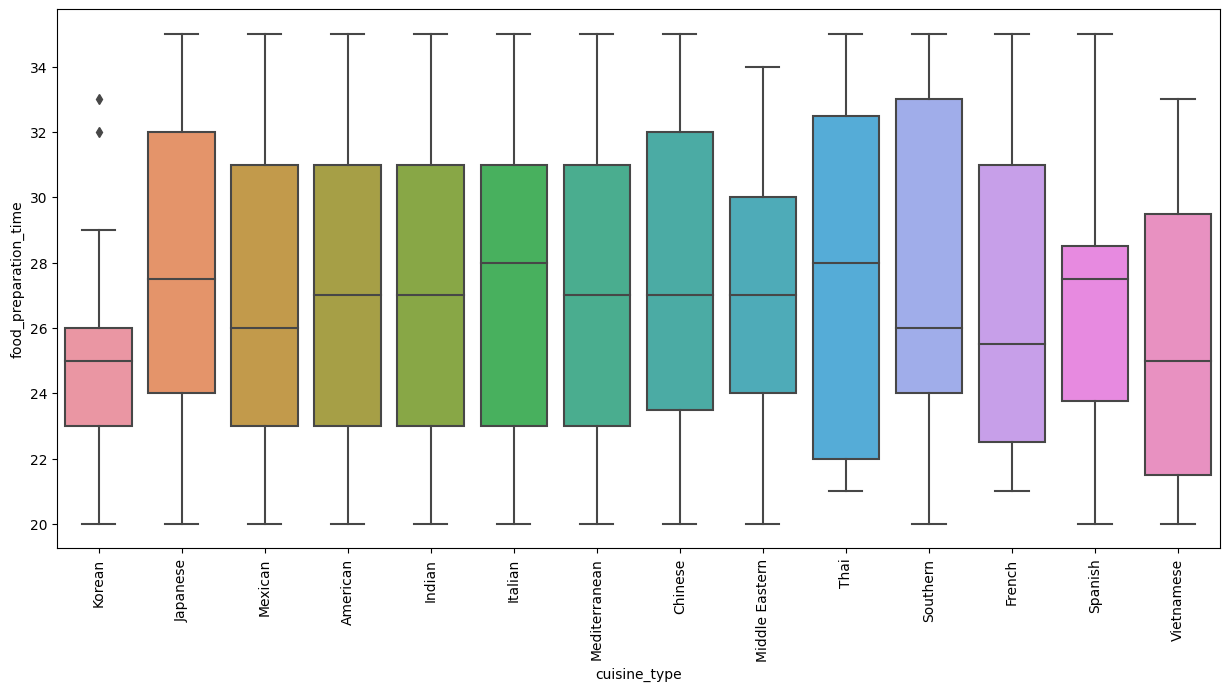

In [ ]:
# Plot boxplot of food_preparation_time vs cuisine_type
plt.figure(figsize = (15, 7))
sns.boxplot(df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 90);

#### Delivery Time vs Day of the Week

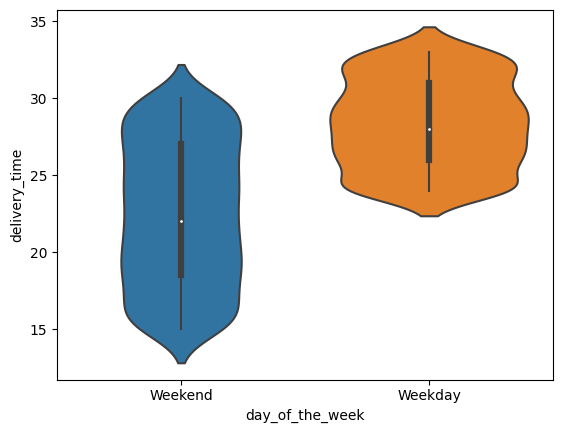

In [ ]:
# Plot violinplot of delivery_time vs day_of_the_week
sns.violinplot(df, x = "day_of_the_week", y = "delivery_time");

#### Observation:
Delivery time is significantly higher on weekday than weekend.

#### Food Preparation Time vs Day of the Week

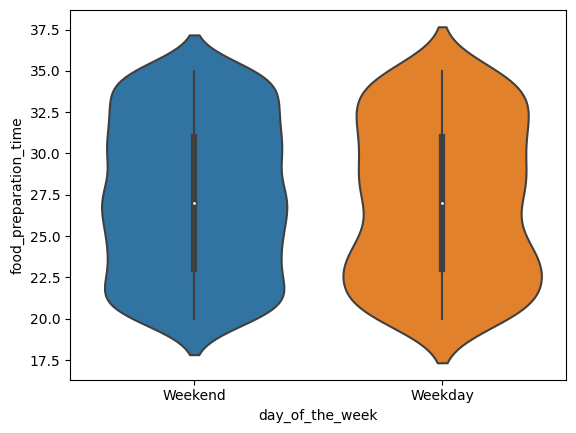

In [ ]:
# Plot violinplot of food_preparation_time vs day_of_the_week
sns.violinplot(df, x = "day_of_the_week", y = "food_preparation_time");

#### Observation:
Food preparation time remains similar across both weekend and weekday.

#### Cost of the Order vs Rating

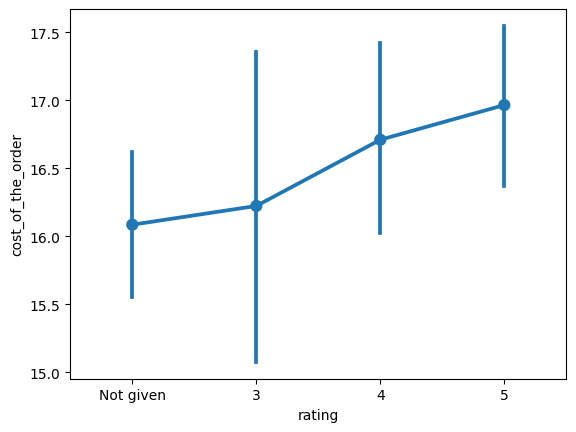

In [ ]:
# Create an order for values in the categorical variable, rating
rating_order = ["Not given", "3", "4", "5"]

# Plot cost_of_the_order vs rating
sns.pointplot(df, y = "cost_of_the_order", x = "rating", order = rating_order);

#### Observation:
There is seemingly a positive correlation between cost of order and rating, where orders with higher rating tends to have higher cost as well.

#### Food Preparation Time vs Rating

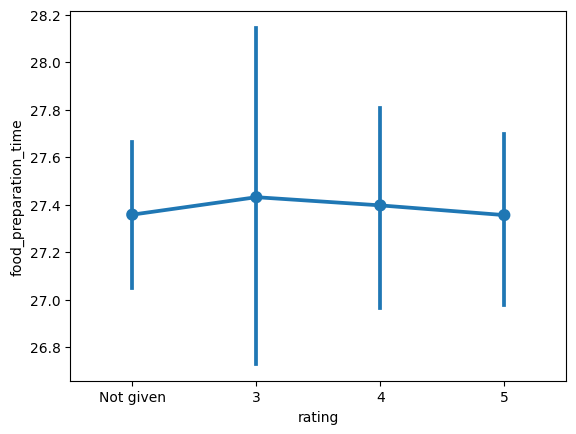

In [ ]:
# Plot food_preparation_time vs rating
sns.pointplot(df, x = "rating", y = "food_preparation_time", order = rating_order);

#### Delivery Time vs Rating

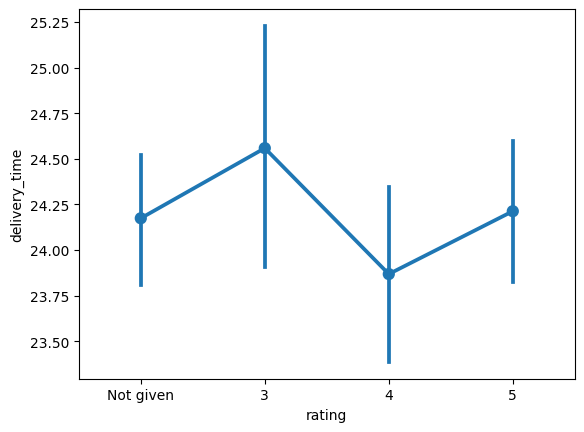

In [ ]:
sns.pointplot(df, x = "rating", y = "delivery_time", order = rating_order);

#### Correlation between Numerical Variables

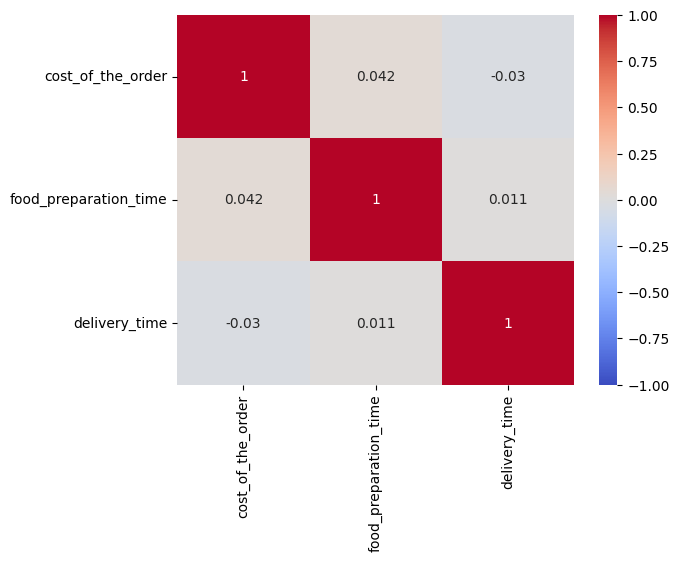

In [ ]:
# Check for correlation between numerical variables
num_var = ["cost_of_the_order", "food_preparation_time", "delivery_time"]
corr = df[num_var].corr()

# Plot the heatmap
sns.heatmap(corr, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1);

#### Observation:
No significant correlation observed between the numerical variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter dataframe by orders, which are given a rating by customer
df_rated = df[df["rating"]!="Not given"]

# Convert the data in "rating" column into integer datatype
df_rated["rating"] = df_rated["rating"].astype("int")

# Group dataframe by restaurant_name, and find the count and average of ratings given
df_rated_by_restaurant = df_rated.groupby(by = ["restaurant_name"]).agg(rating_count = ("rating", "count"), rating_average = ("rating", "mean"))

# Filter grouped dataframe where rating_count > 50 and rating_average > 4
df_rated_by_restaurant[(df_rated_by_restaurant["rating_count"] > 50) & (df_rated_by_restaurant["rating_average"] > 4)].sort_values(by = "rating_count", ascending = False)

,rating_count,rating_average
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
The restaurants that fulfills the criteria of having more than 50 ratings, and their average being greater than 4 are:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* The Meatball Shop
* Shake Shack

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Define a function to calculate revenue based on a given cost
def revenue_calc(cost):
  if cost > 20:
    revenue = 0.25*cost
  elif cost > 5:
    revenue = 0.15*cost
  else:
    revenue = 0
  return revenue

# Apply revenue_calc function to the cost_of_order, and assign the resulting value into a new column named "revenue"
df["revenue"] = df["cost_of_the_order"].apply(revenue_calc)
# Find the sum of revenue
df["revenue"].sum()

6166.303

#### Observations:
The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df.head(2)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120


In [ ]:
# Create a new column, total_time, which is the total of food_preparation_time and delivery_time for each order
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

# Filter the dataframe where total_time > 60, and find the number of orders
total_time_more_than_60 = df[df["total_time"] > 60].shape[0]

# Convert number of orders with total_time > 60, as a percentage of total number of orders
percent_time_more_than_60 = total_time_more_than_60/df.shape[0]*100

print("The percentage of orders that takes more than 60 minutes to get delivered is: {:.2f}%".format(percent_time_more_than_60))

The percentage of orders that takes more than 60 minutes to get delivered is: 10.54%


#### Observations:
10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Group dataframe by day_of_week and find their mean delivery_time
df.groupby(by="day_of_the_week").agg(average_delivery_time = ("delivery_time", "mean"))

,average_delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean delivery time is 28.34 minutes on weekday, and 22.47 minutes on weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Orders rated 3 has significantly higher delivery time than orders rated 4 and 5. This indicates that higher delivery time affects customer experience negatively.
* The top 4 most popular cuisines (out of 14),  make up 82.56% of all orders placed on the online portal. These cuisines are American, Japanese, Italian, and Chinese cuisines.
* Delivery time is significantly higher on weekdays.
* There is a positive correlation between cost of orders and rating provided.
* There are significantly more orders placed on weekend.
* Most customers do not provide rating, but from those who do, higher rating is provided more often than lower rating, which may indicate that customers are more likely to provide rating when the experience is positive, hence lending credence to highly rated restaurants.

### Recommendations:

* A lot more orders are made on weekend, and yet the delivery time is lower on weekend. This suggests that there are more delivery drivers on weekend than weekdays. Availability of drivers need to be ensured on weekdays, as orders with higher delivery time tend to be rated lower.
* As American/Japanese/Italian/Chinese cuisine types make up the majority of the user base, promotional offers surrounding restaurant that offers these cuisine could boost sales.
* Data on which specific day of the week (Monday, Tuesday,etc) and which hour of the day each orders are made, is needed to come up with better and more precise solution.
* More data needs to be collected to account for seasonal changes.

---